In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep'''
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#import lightgbm as lgb

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


# Data Preparation

## Acquire Data

In [3]:
# We only get the train data set
data = pd.read_csv('cernsignal/train.csv')
data=data.set_index("Id")

In [4]:
# signal is the target variable
X=data.drop(["signal","BUTTER"], axis=1) # Droping BUTTER variable as is IRRELEVANT
y=pd.DataFrame(data["signal"])

In [6]:
X.columns = X.columns.str.replace(' ','')

## Explore Data

In [5]:
X.shape

(212662, 14)

In [6]:
X.head()

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA
Id,,,,,,,,,,,,,,
0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,14298.486178,7940.694301,2.628526,2.680116
1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,11553.163934,3904.681337,3.292504,3.085754
2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,24081.196003,4738.891687,3.433676,3.121906
3,14.286133,6.337556,227.375132,0.999806,6740.281614,0.347316,0.591884,0.306927,10593.207077,0.400748,11343.521945,3308.943750,2.291867,2.200712
4,60.474274,7.632751,106.730650,0.999905,5556.388794,0.204273,0.655850,0.196600,11801.249543,0.223101,25940.693317,4026.326871,3.290073,3.281829


In [7]:
X.describe() 

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA
count,212662.000000,212662.000000,2.126620e+05,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000,212662.000000
mean,30.917255,2.831039,3.233108e+03,0.999962,9260.664335,0.573487,0.217185,0.581601,29740.464140,0.595178,23615.399265,5781.262866,3.149949,3.166745
std,15.392944,2.216654,1.498588e+04,0.000068,3997.768903,0.417256,0.484779,0.437939,19239.085505,0.460742,16424.509733,2669.985983,0.520862,0.527135
min,0.204442,0.000038,3.138746e+01,0.999500,2500.513932,0.200005,-0.799991,0.064412,3791.228140,0.053244,4952.118133,3000.031840,2.000000,2.000227
25%,19.250309,0.925412,3.851386e+02,0.999961,6527.503234,0.289879,-0.170048,0.292138,15356.298104,0.294970,11921.223058,3887.726863,2.752651,2.760779
50%,29.615744,2.287488,9.017917e+02,0.999989,8336.548930,0.429935,0.241336,0.436257,24379.336211,0.444553,18693.423754,4986.055993,3.128397,3.151240
75%,41.071903,4.426295,2.564877e+03,0.999998,11065.050625,0.703082,0.634683,0.713462,38994.138332,0.731249,30209.322530,6770.025065,3.526473,3.551590
max,108.067413,7.999920,1.971087e+06,1.000000,56327.186960,2.999445,0.999998,4.376841,99995.109721,4.439294,99982.936241,52715.201472,4.499751,4.499966


In [8]:
X.info() #there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212662 entries, 0 to 212661
Data columns (total 14 columns):
                   B_OWNPV_CHI2     212662 non-null float64
                 B_IPCHI2_OWNPV     212662 non-null float64
                 B_FDCHI2_OWNPV     212662 non-null float64
                   B_DIRA_OWNPV     212662 non-null float64
                           B_PT     212662 non-null float64
             Kst_892_0_IP_OWNPV     212662 non-null float64
            Kst_892_0_cosThetaH     212662 non-null float64
                 Kplus_IP_OWNPV     212662 non-null float64
                        Kplus_P     212662 non-null float64
               piminus_IP_OWNPV     212662 non-null float64
                      piminus_P     212662 non-null float64
                       gamma_PT     212662 non-null float64
                    piminus_ETA     212662 non-null float64
                      Kplus_ETA     212662 non-null float64
dtypes: float64(14)
memory usage: 24.3 MB


In [9]:
#Getting the baseline
100*data.groupby('signal').size()/data.groupby('signal').size().sum()
#y.groupby('signal').signal.count()/y["signal"].count().sum()*100

signal
0.0    66.599581
1.0    33.400419
dtype: float64

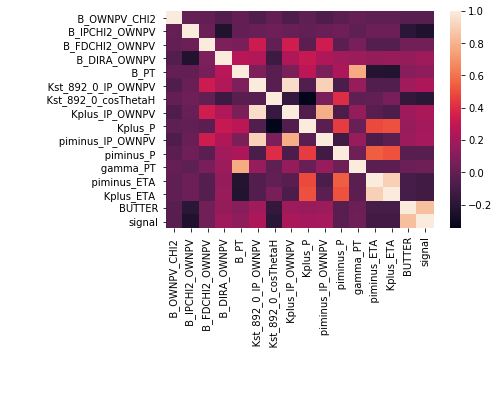

In [10]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
data = data.drop('BUTTER',axis=1)

/Users/alexmartinez/opt/anaconda3/envs/deeplearning/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


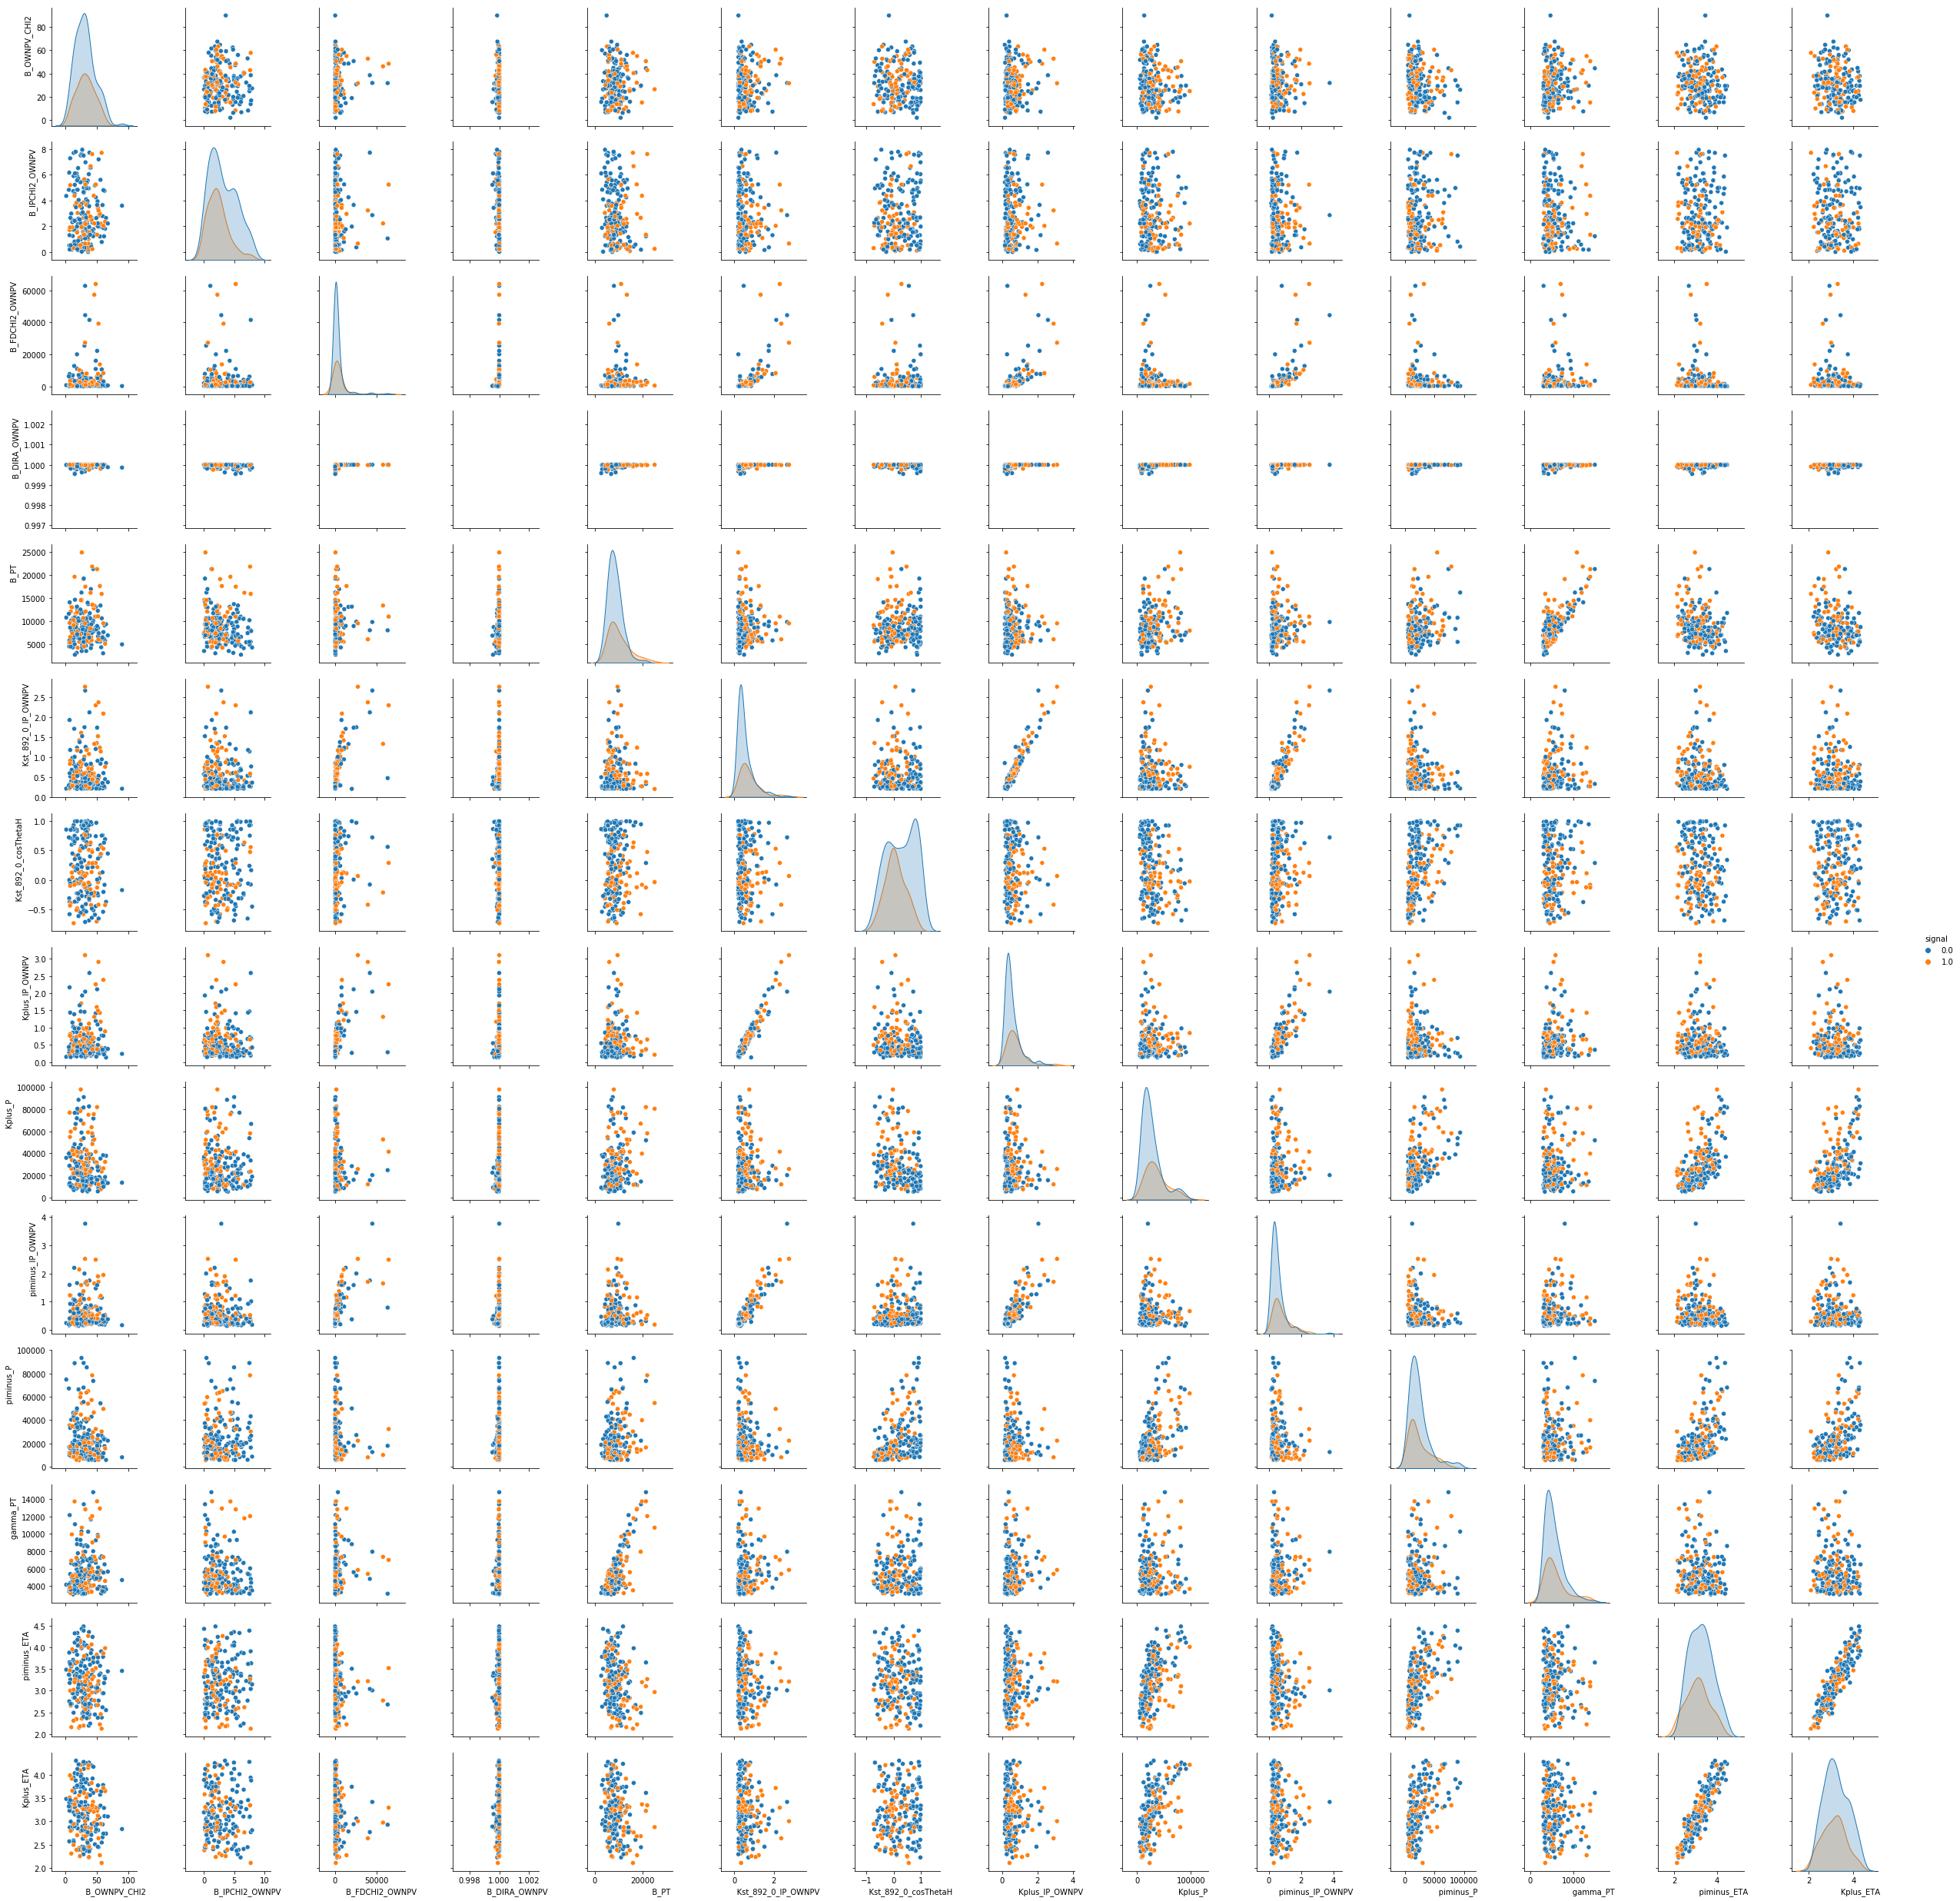

In [39]:
sns.pairplot(data[0::1000],hue='signal')

## Scaling the data

In [11]:
#Standarazing all of the signal variables. Use RobustScaler to avoid outilers effect when normalizing.
X_rscaled=X.copy()
rscaler = RobustScaler()
#X_rscaled[X_scaled.columns.values] = scaler.fit_transform(X_scaled[X_scaled.columns.values])
X_rscaled[X_rscaled.columns.values] = rscaler.fit_transform(X_rscaled)

In [12]:
X_rscaled.describe()

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA
count,2.126620e+05,212662.000000,2.126620e+05,2.126620e+05,212662.000000,2.126620e+05,2.126620e+05,212662.000000,2.126620e+05,2.126620e+05,212662.000000,2.126620e+05,212662.000000,212662.000000
mean,5.964327e-02,0.155261,1.069539e+00,-7.391022e-01,0.203660,3.474142e-01,-3.001162e-02,0.344970,2.268028e-01,3.452486e-01,0.269135,2.758933e-01,0.027852,0.019607
std,7.053996e-01,0.633170,6.875082e+00,1.869856e+00,0.881042,1.009810e+00,6.024103e-01,1.039433,8.139105e-01,1.056071e+00,0.898098,9.263393e-01,0.673102,0.666574
min,-1.347807e+00,-0.653392,-3.993158e-01,-1.339511e+01,-1.286165,-5.564596e-01,-1.294006e+00,-0.882562,-8.709809e-01,-8.969221e-01,-0.751380,-6.890419e-01,-1.458212,-1.455484
25%,-4.750081e-01,-0.389066,-2.370252e-01,-7.769254e-01,-0.398684,-3.389516e-01,-5.112066e-01,-0.342062,-3.817201e-01,-3.428614e-01,-0.370306,-3.810602e-01,-0.485572,-0.493748
50%,-8.140357e-17,0.000000,2.607809e-17,-1.519405e-12,0.000000,6.717183e-17,1.724517e-17,0.000000,-7.695210e-17,-6.361874e-17,0.000000,1.577725e-16,0.000000,0.000000
75%,5.249919e-01,0.610934,7.629748e-01,2.230746e-01,0.601316,6.610484e-01,4.887934e-01,0.657938,6.182799e-01,6.571386e-01,0.629694,6.189398e-01,0.514428,0.506252
max,3.595139e+00,1.631712,9.038630e+02,2.902751e-01,10.576339,6.218528e+00,9.427517e-01,9.352846,3.198929e+00,9.156377e+00,4.444940,1.655941e+01,1.772181,1.705496


Using **Robust Scaling** to avoid outliers effect when scaling

More info in: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

## Feature engineering

In [13]:
# EMPTY AT THIS POINT

# Model Training and testing

## Neural Network

In [14]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_rscaled, y, test_size=0.3)

In [15]:
#Shape of train data
print('Shape of training data:',X_train.values.shape)

Shape of training data: (148863, 14)


In [16]:
#Model: Fully connected neural network
input_data = Input(shape=(14,))
denselayer1 = Dense(units=100, activation = 'relu',input_shape = (14,))(input_data)
denselayer2 = Dense(units=90,activation = 'relu')(denselayer1)
denselayer3 = Dense(units=80,activation = 'relu')(denselayer2)
denselayer4 = Dense(units=70,activation = 'relu')(denselayer3)
denselayer5 = Dense(units=60,activation = 'relu')(denselayer4)
denselayer6 = Dense(units=50,activation = 'relu')(denselayer5)
denselayer7 = Dense(units=25,activation = 'relu')(denselayer6)
outputlayer = Dense(units=1, activation='sigmoid')(denselayer7)
model = Model(inputs=input_data, outputs=outputlayer,name="BosonNN")
model.summary()

Model: "BosonNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 14)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1500      
_________________________________________________________________
dense_2 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                7280      
_________________________________________________________________
dense_4 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_5 (Dense)              (None, 60)                4260      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3050

In [17]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['binary_accuracy'],
)

In [18]:
# Train the model.
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callback = EarlyStopping(monitor='val_loss', mode='min',patience=5, verbose=1)
checkpoint = ModelCheckpoint('Models/best_model_boson.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
        # This callback will stop the training when there is no improvement in  
        # the binary_crossentropy for five consecutive epochs.    

history=model.fit(
  X_train,
  y_train,
  validation_split=0.25,
  epochs=100,
  batch_size=32,
  callbacks=[callback,checkpoint]
    )

Train on 111647 samples, validate on 37216 samples
Epoch 1/100
111647/111647 [==============================] - 5s 45us/step - loss: 0.4679 - binary_accuracy: 0.7705 - val_loss: 0.4482 - val_binary_accuracy: 0.7836

Epoch 00001: val_loss improved from inf to 0.44820, saving model to Models/best_model_boson.h5
Epoch 2/100
111647/111647 [==============================] - 4s 39us/step - loss: 0.4390 - binary_accuracy: 0.7877 - val_loss: 0.4387 - val_binary_accuracy: 0.7870

Epoch 00002: val_loss improved from 0.44820 to 0.43874, saving model to Models/best_model_boson.h5
Epoch 3/100
111647/111647 [==============================] - 4s 39us/step - loss: 0.4276 - binary_accuracy: 0.7961 - val_loss: 0.4295 - val_binary_accuracy: 0.7930

Epoch 00003: val_loss improved from 0.43874 to 0.42947, saving model to Models/best_model_boson.h5
Epoch 4/100
111647/111647 [==============================] - 4s 39us/step - loss: 0.4158 - binary_accuracy: 0.8026 - val_loss: 0.4318 - val_binary_accuracy: 0.79

In [19]:
from keras.models import load_model
best_model = load_model('Models/best_model_boson.h5',compile = False)
#custom_objects={"auc_1":tf.keras.metrics.AUC()}

In [20]:
best_model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['binary_accuracy'],
)

In [21]:
best_model.evaluate(
  X_test,
 y_test
)

63799/63799 [==============================] - 1s 11us/step


[0.37927852251658284, 0.8244172930717468]

In [22]:
print(best_model.metrics_names)

['loss', 'binary_accuracy']


In [23]:
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

In [24]:
print('Train',roc_auc_score(y_train,predictions_train))
print('Test',roc_auc_score(y_test,predictions_test))

Train 0.9040178627623263
Test 0.8954667036524148


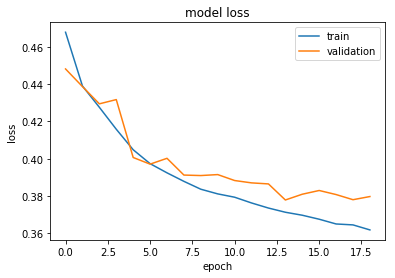

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()